In [29]:
import seaborn as sns
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

from numpy import ndarray

%run hidden_neuron.py
%run input_neuron.py
%run input_layer.py
%run hidden_layer.py
%run output_neuron.py
%run output_layer.py
%run neural_network.py
%run training.py

from input_layer    import InputLayer
from hidden_layer   import HiddenLayer
from output_layer   import OtputLayer
from neural_network import DiadicNetwork
from training       import ErrorFunction


In [30]:
def show_matrix ( array: ndarray) -> None:
    "Visualise 2d matrix."

    size = tuple(int(x *0.3) for x in array.shape)

    _, ax = plt.subplots(figsize = size)
    
    sns.heatmap(
                array, 
                annot  = True, 
                cbar   = False, 
                cmap   = sns.cubehelix_palette(as_cmap=True),
                ax     = ax,
                
                xticklabels = False,
                yticklabels = False
    )


def plot_graph (adj_matrix: ndarray) -> None:
     "Plot graph from adjacency matrix."

     size  = tuple(int(x *0.5) for x in adj_matrix.shape)

     _, ax = plt.subplots(figsize = size)
    
     
     G = nx.from_numpy_array(adj_matrix)
     nx.draw(G, with_labels=True, node_size=300, node_color="skyblue", pos=nx.spring_layout(G), ax = ax)
     plt.show()
     

def matrix ( size: tuple, min: float|int, max: float|int, seed: int) -> ndarray:
    " Get random initialised 2d matrix."
    
    rng =  np.random.default_rng( seed = seed)
    
    if isinstance(min, int) and isinstance(max, int):
         return rng.integers(low = min, high =  max, size = size)
    else:
         return rng.random(low = min, high =  max, size = size)

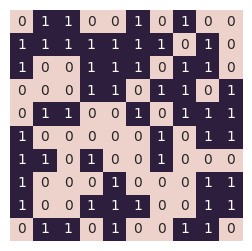

In [31]:
mat = matrix((10,10), min = 0, max = 2, seed = 42)
show_matrix(mat)

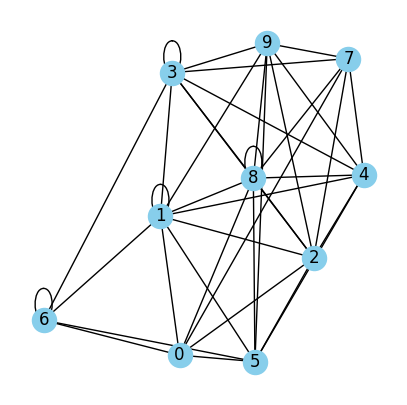

In [32]:
plot_graph(mat)

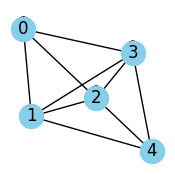

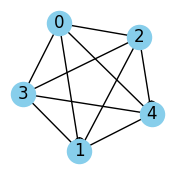

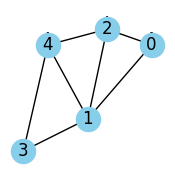

In [33]:
network_partition = [matrix((5,5), min = 0, max  = 2, seed = i) for i in range(3)]

for mat in network_partition:
    plot_graph(mat)

In [34]:
matricies = [matrix((5,5), min = 0, max  = 2, seed = i) for i in range(3)]
ids       = [(1,2),(1,1),(1,3)]

In [35]:
net_args = {

'input_ids':           ids,
'feature_list':        ['average_clustering'],
'network_partition':   dict(zip(ids, matricies)),
'factor_data':         np.array([100,123,97]),
'input_to_hidden_map': {
                         (1,2): [(1,2), (1,1)],
                         (1,1): [(1,1)],
                         (1,3): [(1,3), (1,1)]
                         
                        }

}

input_args = { 
                  'neuron_ids':          ids,
                  'feature_list':       ['average_clustering'],
                  'network_partition':  dict(zip(ids, matricies))

}

In [36]:
input_l = InputLayer(**input_args)

for _, neuron in input_l.neuron_list.items():
    f = neuron.features
    print(f)

{'average_clustering': 0.9}
{'average_clustering': 1.0}
{'average_clustering': 0.7666666666666666}
{'average_clustering': 0.9}
{'average_clustering': 1.0}
{'average_clustering': 0.7666666666666666}


In [37]:
hidden_args = {
                'input_to_hidden_map':   net_args['input_to_hidden_map'],
                'activation_function':  'expit',
                'input_layer':           input_l


}

In [38]:
hidden_l = HiddenLayer(**hidden_args)

In [39]:
hidden_w = {
    (1,2): np.random.normal(size = 4),
    (1,1): np.random.normal(size = 2),
    (1,3): np.random.normal(size = 4)
}

In [40]:
hidden_l(hidden_w)

In [41]:
output_args = {
                'hidden_layer': hidden_l,
                'factor_data':  np.array([0.5, 1.3, 0.233])
}

In [42]:
output_l = OtputLayer(**output_args)

In [43]:
network = DiadicNetwork(**net_args)

{'average_clustering': 0.9}
{'average_clustering': 1.0}
{'average_clustering': 0.7666666666666666}


In [44]:
params = {
    'hidden': hidden_w,
    'output': np.random.normal(size = 3)
}

In [45]:
network(params)

6.280649065480476

In [46]:
err_f = ErrorFunction(network, np.random.normal(size = 100))

In [47]:
err_f(np.random.normal(size = 13))

0.9757952476585052

In [48]:
err_f.grad(np.random.normal(size = 13))

array([-3.51527979e+00, -6.38594465e+00, -9.28110021e+00, -1.18958455e+01,
        3.29785928e+02,  8.88465822e+02,  8.06250608e+02,  7.45707974e+02,
        6.70194358e+02,  5.98764964e+02,  2.32669619e+03,  3.99275414e+03,
        6.68244638e+03])

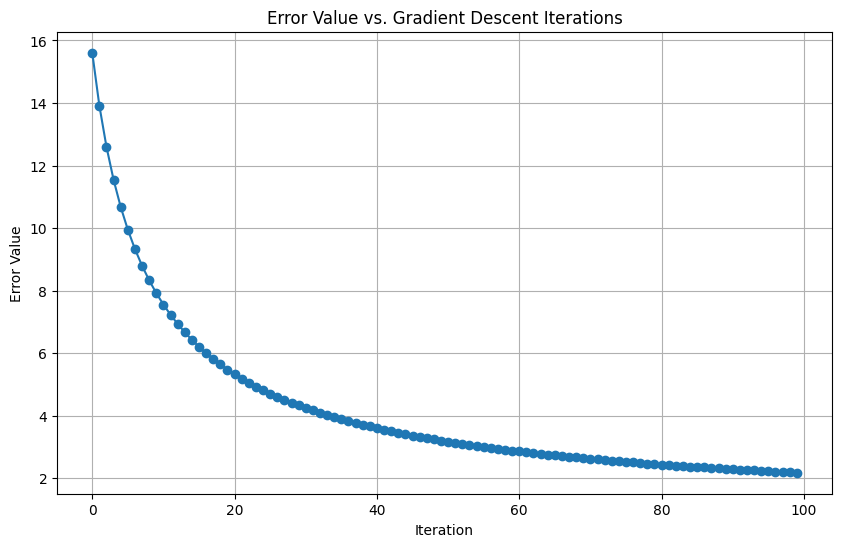

In [51]:
# gradient descent 

descent_param  = .00001
error          = ErrorFunction(network, np.random.normal(size = 100))

x0 = np.array(np.random.normal(size = 13))

error_values = []

for i in range(100):
    error_val = error(x0)
    error_values.append(error_val)  # Store the error
    x0 += -descent_param * error.grad(x0)

# Plotting the error values
plt.figure(figsize=(10, 6))
plt.plot(error_values, marker='o', linestyle='-')
plt.title('Error Value vs. Gradient Descent Iterations')
plt.xlabel('Iteration')
plt.ylabel('Error Value')
plt.grid(True)
plt.show()
